
In this exercise you will use again the dataset in EFIplus_medit.zip to perform some hypothesis testing
1. Standardize, using z-score, the “Mean Annual Temperature” (Temp_ann), calculate the new mean, SD and 95% confidence interval, and plot the histogram.
2. Test whether the means (or medians) of “Mean Annual Temperature” between presence and absence sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test using both standardized and non-standardized values. Please state which is/are the null hypothesis of your test(s).
3. Test whether there are diferences in the mean elevation in the upstream catchment (Elevation_mean_catch) among the eight most sampled catchments. For which pairs of catchments are these diferences significant? Please state which is/are the null hypothesis of your test(s).
4. Which potential problems did you identified in the data that could limit the conclusions derived from the performed tests?

In [14]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as sts
import statsmodels.stats as stm
import scikit_posthocs as sp
import seaborn as sns

#load dataset
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)
# handle missing values:
df.dropna()

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

# Extract the 'Mean Annual Temperature' column
temp_ann = df['temp_ann']

#1 
Standardize the mean annual temp using z score:

Why? 
Provides a standardized framework for analyzing and interpreting temperature data, making it easier to compare, analyze, and draw conclusions from the dataset

Z-scores provide a standardized measure of how each data point relates to the mean of the dataset in terms of standard deviation units. 1They help in understanding the relative position, magnitude of deviation, and standardization of data points, making comparisons and outlier detection easier.

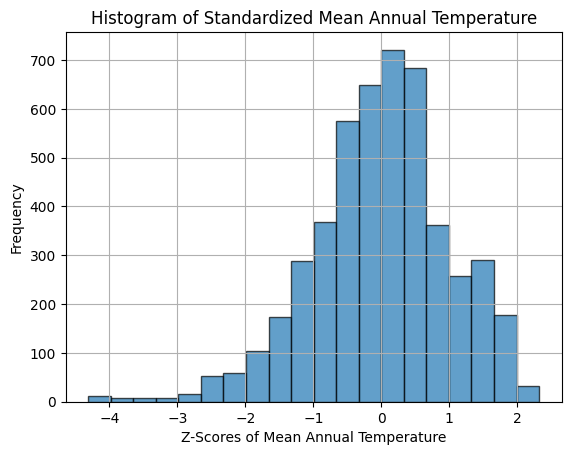

New Mean: -7.749774106203943e-16
New Standard Deviation: 1.0
95% Confidence Interval: (-1.9599639845400547, 1.9599639845400534)


In [15]:
#1 
# Standardize the 'Mean Annual Temperature' using z-score
# z score = provide a standardized measure of how each data point relates to the mean of the dataset in terms of standard deviation units.
    
z_scores = (temp_ann - temp_ann.mean()) / temp_ann.std()

# Calculate the new mean and standard deviation
new_mean = z_scores.mean()
new_std = z_scores.std()

# Calculate the 95% confidence interval
confidence_interval = stats.norm.interval(0.95, loc=new_mean, scale=new_std)

# Plot the histogram
plt.hist(z_scores, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Z-Scores of Mean Annual Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Mean Annual Temperature')
plt.grid(True)
plt.show()

print(f"New Mean: {new_mean}")
print(f"New Standard Deviation: {new_std}")
print(f"95% Confidence Interval: {confidence_interval}")

#2 
Test whether the means (or medians) of “Mean Annual Temperature” between presence and absence sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test using both standardized and non-standardized values. Please state which is/are the null hypothesis of your test(s).

In [19]:
#2

import pandas as pd
from scipy import stats

#load dataset
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)


# Extract the 'Mean Annual Temperature' and 'salmon trutta fario' columns
temp_ann = df['temp_ann']
salmo_trutta_fario = df['Salmo trutta fario']

# Separate data into presence and absence groups based on 'Salmo trutta fario' column
presence = df[df['Salmo trutta fario'] == 1]
absence = df[df['Salmo trutta fario'] == 0]
presence_temp = presence['temp_ann'].dropna()
absence_temp = absence['temp_ann'].dropna()

# H0: The means of "Mean Annual Temperature" between presence and absence sites of Brown Trout are equal.

# t-test ==> tests the null hypothesis that sample 1 and 2 are derived from populations with the same mean
print('t-test')
stat, p = sts.ttest_ind(presence_temp,absence_temp)
print('Statistics=%.3f, p=%.3f' % (stat, p)) # print outputs
alpha=0.05
if p > alpha:
    print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
    print('reject H0 with an error probability <0.05)')

#using a mannwhitney test = The medians of two random variables are equal (independent or paired samples).
print('mannwhitneytest')
stat, p = sts.mannwhitneyu(presence_temp, absence_temp, alternative='two-sided')
print('stat=%.3f, p-value=%.3f' % (stat, p))
alpha=0.05
if p > alpha:
 print('fail to reject H0. Rejecting H0 has an error probability >0.05')
else:
 print('reject H0 with an error probability <0.05)')


t-test
Statistics=-43.454, p=0.000
reject H0 with an error probability <0.05)
mannwhitneytest
stat=1027812.500, p-value=0.000
reject H0 with an error probability <0.05)


In [18]:
#3
#Test whether there are diferences in the mean elevation in the upstream catchment (Elevation_mean_catch) among the 8 most sampled catchments. 
#For which pairs of catchments are these diferences significant? 
#Please state which is/are the null hypothesis of your test(s).

from scipy.stats import f_oneway
import pandas as pd


# Filter the data to include only the eight most sampled catchments
counts = df['Catchment_name'].value_counts()
top_8_sites = counts.nlargest(8).index
top_8_sites_df = df[df['Catchment_name'].isin(top_8_sites)].dropna()
elevation = [top_8_sites_df[top_8_sites_df['Catchment_name'] == catchment]['Elevation_mean_catch'] for catchment in top_8_sites]

# ANOVA test = Two or more groups have the same population mean
stat, p = f_oneway(*elevation)
print('ANOVA results:')
print('F-statistic=%.3f, p=%.6f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Fail to reject H0. There are no significant differences in mean elevation among the eight most sampled catchments.')
else:
    print('Reject H0. There are significant differences in mean elevation among the eight most sampled catchments.')



ANOVA results:
F-statistic=166.490, p=0.000000
Reject H0. There are significant differences in mean elevation among the eight most sampled catchments.


#4  Which potential problems did you identified in the data that could limit the conclusions derived from the performed tests?
1) null data/missing values present for both the elevation and catchment columns
2) Potential outliers in catchment data
3) Assuming catchment data and elevation data is Normally distributed
4) Assuming that each population has the same variance
5) Assuming that the populations are randomly sampled  